# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [115]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [84]:
# your answer here
employee = pd.read_csv('data/Employee.csv', index_col=0)
employee

,Department,Education,Gender,Title,Years,Salary
Name,,,,,,
Jose,IT,Bachelor,M,analyst,1,35
Maria,IT,Master,F,analyst,2,30
David,HR,Master,M,analyst,2,30
Sonia,HR,Bachelor,F,analyst,4,35
Samuel,Sales,Master,M,associate,3,55
Eva,Sales,Bachelor,F,associate,2,55
Carlos,IT,Master,M,VP,8,70
Pedro,IT,Phd,M,associate,7,60
Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [21]:
# Method 1
# your answer here
mean_sal = employee.groupby('Department')['Salary'].mean()

In [59]:
# Method 2
# your answer here
mean_sal_pi = pd.pivot_table(employee, values='Salary', index='Department', aggfunc='mean')
mean_sal_pi

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [61]:
# your answer here
years_title = pd.pivot_table(employee, values=['Salary'], index=['Department','Title'] )
years_title

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [64]:
# your answer here
years_title = pd.pivot_table(employee, values=['Salary','Years'], index=['Title'] )
years_title

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [66]:
# your answer here
mean_sal = pd.pivot_table(employee, values=['Salary'], index= ['Department','Title'], aggfunc=['mean','count'])
mean_sal


mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [67]:
# your answer here
stats = pd.pivot_table(employee, values=['Salary'], index= ['Department','Title'], aggfunc=['median','min','max','std'])
stats

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [68]:
# your answer here
stats = stats.fillna(0)
stats

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [75]:
# your answer here
stake = pd.pivot_table(employee, values=['Salary'], index= ['Department',], aggfunc={'sum','count'})
stake

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [80]:
# your answer here
work_exp = pd.pivot_table(employee, values=['Salary','Years'], index= ['Department','Title'], aggfunc={'Salary':'mean','Years':'sum'})
work_exp

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [88]:
# your answer here
max_salaries = employee.groupby('Department')['Salary'].transform('max')
df = employee[employee['Salary'] < max_salaries]
after_max = pd.pivot_table(df, values=['Salary'], index= ['Department'], aggfunc={'mean'})
after_max

,Salary
,mean
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [92]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv', index_col=0)
fitbit

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Date,,,,,,,,,,,,,
08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [90]:
# your answer here
fitbit.dtypes

Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [91]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [93]:
# your answer here
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

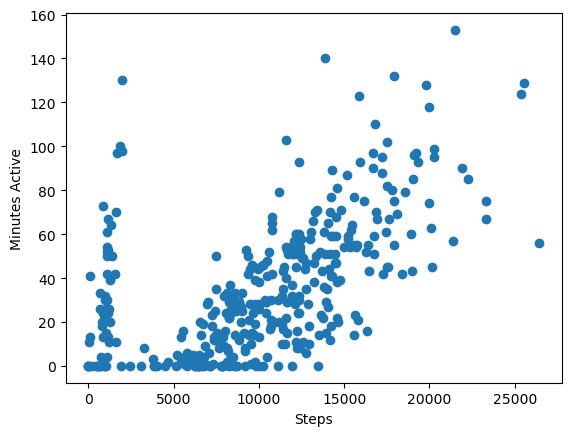

In [98]:
# your answer here


x=fitbit['Steps']
y=fitbit['Minutes Very Active']

plt.scatter(x,y)
            
plt.xlabel('Steps')
plt.ylabel('Minutes Active')

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [124]:
# your answer here
# there is a growing pattern between the two. The more steps there are, the more minutes is active
# 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [99]:
# your answer here
min_sed = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
min_sed

0.07690608062990095

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

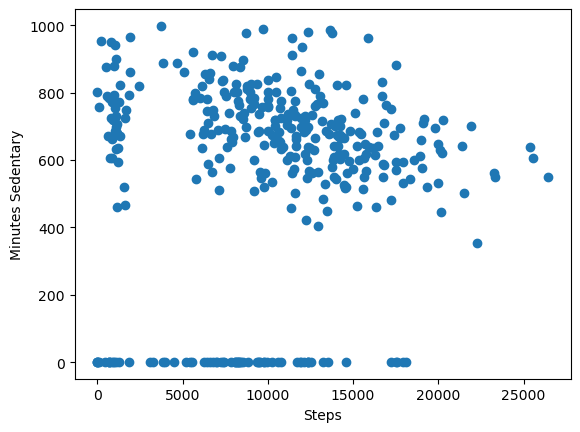

In [102]:
# your answer here
y = fitbit['Minutes Sedentary']
x = fitbit['Steps']

plt.ylabel('Minutes Sedentary')
plt.xlabel('Steps')

plt.scatter(x,y)

plt.show()

#they also have a pattern. the more steps there are, the minutes sedentary appear do decrease also

In [ ]:
#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [103]:
# your answer here
min_sleep = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
min_sleep

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

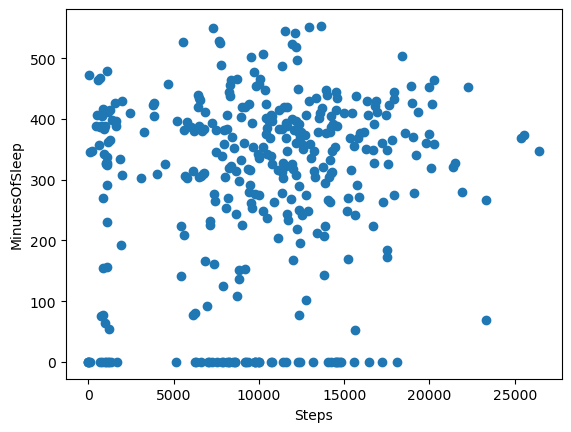

In [104]:
# your answer here
y = fitbit['MinutesOfSleep']
x = fitbit['Steps']

plt.ylabel('MinutesOfSleep')
plt.xlabel('Steps')

plt.scatter(x,y)

plt.show()

#

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [105]:
# your answer here
subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [108]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [113]:
# your answer here
time_grades = pd.read_csv('data/Time_grades.csv', index_col=0)
time_grades

,Study time,Grade
Name,,
Jose,4,4
Maria,9,7
David,8,9
Sonia,10,7
Samuel,20,9
Eva,5,3
Carlos,12,7
Pedro,6,5
Ana,18,9


#### Show visually the frequency distribution of the time_grades dataset.

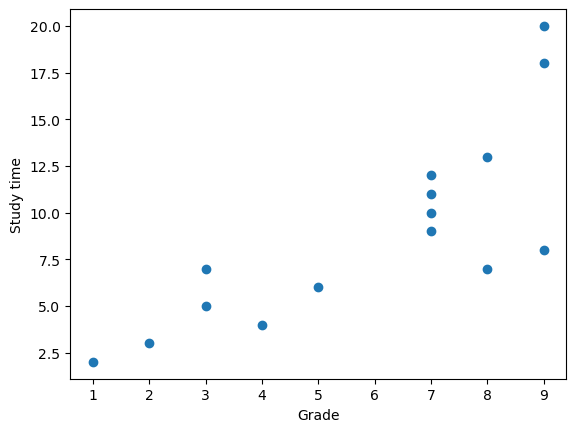

In [128]:
# your answer here
x = time_grades['Grade']
y = time_grades['Study time']

plt.xlabel('Grade')
plt.ylabel('Study time')


plt.scatter(x,y)

plt.show()

In [ ]:
#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [123]:
# your answer here
print("Pearson correlation:",stats.pearsonr(time_grades["Study time"], time_grades["Grade"])[0])

print("Spearman correlation",stats.spearmanr(time_grades['Study time'], time_grades['Grade'])[0])

Pearson correlation: 0.7980456073578859
Spearman correlation 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

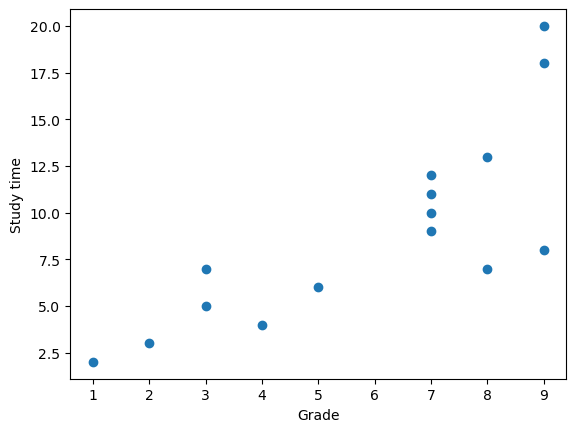

In [125]:
# your answer here
x = time_grades['Grade']
y = time_grades['Study time']

plt.xlabel('Grade')
plt.ylabel('Study time')


plt.scatter(x,y)

plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [129]:
# your answer here
#Pearson as a more straight linear relation and direction
#spearman as an exponential type of relation. provides only the direction and is not linear
